# Part 5 - Finding nearest address with reverse geocoding

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#The-required-location-parameter" data-toc-modified-id="The-required-location-parameter-2">The required <code>location</code> parameter</a></span></li><li><span><a href="#The-simple-reverse-geocode-examples" data-toc-modified-id="The-simple-reverse-geocode-examples-3">The simple reverse geocode examples</a></span><ul class="toc-item"><li><span><a href="#Example-1---location-input-as-list" data-toc-modified-id="Example-1---location-input-as-list-3.1">Example 1 - location input as list</a></span></li><li><span><a href="#Example-2---location-input-as-dict" data-toc-modified-id="Example-2---location-input-as-dict-3.2">Example 2 - location input as dict</a></span></li><li><span><a href="#Example-3---location-input-as-dict-with-sr" data-toc-modified-id="Example-3---location-input-as-dict-with-sr-3.3">Example 3 - location input as dict with sr</a></span></li><li><span><a href="#Example-4---location-input-as-Point-Geometry-object" data-toc-modified-id="Example-4---location-input-as-Point-Geometry-object-3.4">Example 4 - location input as Point Geometry object</a></span></li></ul></li><li><span><a href="#Reverse-geocode-a-location-clicked-on-the-map" data-toc-modified-id="Reverse-geocode-a-location-clicked-on-the-map-4">Reverse geocode a location clicked on the map</a></span></li><li><span><a href="#Get-result-as-intersection-instead-of-address-(return_intersection-param)" data-toc-modified-id="Get-result-as-intersection-instead-of-address-(return_intersection-param)-5">Get result as intersection instead of address (<code>return_intersection</code> param)</a></span></li><li><span><a href="#Get-results-in-desired-SR" data-toc-modified-id="Get-results-in-desired-SR-6">Get results in desired SR</a></span></li><li><span><a href="#Get-results-in-desired-language-(lang_code-param)" data-toc-modified-id="Get-results-in-desired-language-(lang_code-param)-7">Get results in desired language (<code>lang_code</code> param)</a></span></li><li><span><a href="#Customize-the-address-type-of-searches-(feature_types-param)" data-toc-modified-id="Customize-the-address-type-of-searches-(feature_types-param)-8">Customize the address type of searches (<code>feature_types</code> param)</a></span></li><li><span><a href="#Limit-searches-by-distance-param" data-toc-modified-id="Limit-searches-by-distance-param-9">Limit searches by <code>distance</code> param</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-10">Conclusions</a></span></li></ul></div>

## Introduction

The `reverse_geocode()` function in the `arcgis.geocoding` module determines the address at a particular `x/y` location. You can pass the coordinates of a point location to the `geocoder`, and get returned the address that is closest (or nearest) to the location.

<img src="https://developers.arcgis.com/rest/geocode/api-reference/GUID-3A7A77E6-2E26-44E2-A7BA-362DA4EFC0E4-web.png" />

In [1]:
from arcgis.geocoding import reverse_geocode

help(reverse_geocode)

Help on function reverse_geocode in module arcgis.geocoding._functions:

reverse_geocode(location, distance=None, out_sr=None, lang_code=None, return_intersection=False, for_storage=False, geocoder=None, feature_types=None, roof_top='street')
    The reverse_geocode operation determines the address at a particular
    x/y location. You pass the coordinates of a point location to the
    geocoding service, and the service returns the address that is
    closest to the location.
    
    =================== ====================================================
    **Argument**        **Description**
    ------------------- ----------------------------------------------------
    location            required list/Point Geometry
    ------------------- ----------------------------------------------------
    distance            optional float, radial distance in meteres to
                        search for an address.  The default is 100 meters.
    ------------------- --------------------

## The required `location` parameter

As shown from the above help output, the only required input parameter of `reverse_geocode()` is the `location` parameter, which is the point from which to search for the closest address. The point can be represented as a simple `list` of coordinates ([x, y] or [longitude, latitude]), a `dict` object (with or without spatial reference) or say a JSON point object, or a Point Geometry object.

The spatial reference of the list of coordinates is always `WGS84` (in decimal degress), the same coordinate system as the World Geocoding Service.

Use JSON formatting to specify any other coordinate system for the input location. Specifically, set the spatial reference using its `well-known ID (WKID)` value. For a list of valid WKID values, see <a href="http://resources.arcgis.com/EN/HELP/REST/APIREF/GCS.HTML">Projected Coordinate Systems and Geographic Coordinate Systems</a>.

Example using simple syntax and the default `WGS84` spatial reference:
```
location=[103.8767227,1.3330736]
```
Example using JSON and the default `WGS84` spatial reference:
```
location={"x": 103.876722, "y": 1.3330736}
```
Example using JSON and specifying a spatial reference (`WGS84 Web Mercator Auxiliary Sphere`): 
```
location= { "x": 11563503, "y": 148410, "spatialReference": { "wkid": 3857 } }
```

## The simple reverse geocode examples

Next, we will look at different kinds of input for the `location` parameter - (1) list, (2) dict, (3) dict with sr, and (4) Point object. Note that, when composing a list containing x/y coordinates, the order is X,Y and not Y,X as in lat, long.

In [2]:
from arcgis.gis import GIS
from arcgis.geocoding import reverse_geocode

gis = GIS("portal url", "username", "password")

### Example 1 - location input as list

In [ ]:
results = reverse_geocode([2.2945, 48.8583])

In [6]:
type(results)

dict

In [5]:
results

{'address': {'Match_addr': 'Salle Gustave Eiffel',
  'LongLabel': 'Salle Gustave Eiffel, Avenue Gustave Eiffel, 75007, 7e Arrondissement, Paris, Île-de-France, FRA',
  'ShortLabel': 'Salle Gustave Eiffel',
  'Addr_type': 'POI',
  'Type': 'Convention Center',
  'PlaceName': 'Salle Gustave Eiffel',
  'AddNum': '',
  'Address': 'Avenue Gustave Eiffel',
  'Block': '',
  'Sector': '',
  'Neighborhood': 'Gros Caillou',
  'District': '7e Arrondissement',
  'City': 'Paris',
  'MetroArea': '',
  'Subregion': 'Paris',
  'Region': 'Île-de-France',
  'Territory': '',
  'Postal': '75007',
  'PostalExt': '',
  'CountryCode': 'FRA'},
 'location': {'x': 2.2951599583073303,
  'y': 48.85784000836726,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}}

### Example 2 - location input as dict

In [11]:
results = reverse_geocode(location={"x": 103.876722, "y": 1.3330736})
results

{'address': {'Match_addr': 'Sennett Estate, 40 Lichi Avenue, 348814, Singapore',
  'LongLabel': 'Sennett Estate, 40 Lichi Avenue, 348814, Singapore, SGP',
  'ShortLabel': 'Sennett Estate, 40 Lichi Avenue',
  'Addr_type': 'PointAddress',
  'Type': '',
  'PlaceName': '',
  'AddNum': '40',
  'Address': 'Sennett Estate, 40 Lichi Avenue',
  'Block': '',
  'Sector': '',
  'Neighborhood': '',
  'District': '',
  'City': 'Singapore',
  'MetroArea': '',
  'Subregion': '',
  'Region': 'Singapore',
  'Territory': '',
  'Postal': '348814',
  'PostalExt': '',
  'CountryCode': 'SGP'},
 'location': {'x': 103.87671885261159,
  'y': 1.333058719212687,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}}

### Example 3 - location input as dict with sr

In [12]:
results = reverse_geocode(location= { "x": 11563503, "y": 148410, "spatialReference": { "wkid": 3857 } })
results

{'address': {'Match_addr': 'Sennett Estate, 40 Lichi Avenue, 348814, Singapore',
  'LongLabel': 'Sennett Estate, 40 Lichi Avenue, 348814, Singapore, SGP',
  'ShortLabel': 'Sennett Estate, 40 Lichi Avenue',
  'Addr_type': 'PointAddress',
  'Type': '',
  'PlaceName': '',
  'AddNum': '40',
  'Address': 'Sennett Estate, 40 Lichi Avenue',
  'Block': '',
  'Sector': '',
  'Neighborhood': '',
  'District': '',
  'City': 'Singapore',
  'MetroArea': '',
  'Subregion': '',
  'Region': 'Singapore',
  'Territory': '',
  'Postal': '348814',
  'PostalExt': '',
  'CountryCode': 'SGP'},
 'location': {'x': 103.87671885261159,
  'y': 1.333058719212687,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}}

### Example 4 - location input as Point Geometry object

In [7]:
from arcgis.geometry import Geometry

pt = Geometry({
    "x": 11563503,
    "y": 148410,
    "spatialReference": {
        "wkid": 3857
    }
})

In [8]:
results = reverse_geocode(pt)
type(results)

dict

In [9]:
results

{'address': {'Match_addr': 'Sennett Estate, 40 Lichi Avenue, 348814, Singapore',
  'LongLabel': 'Sennett Estate, 40 Lichi Avenue, 348814, Singapore, SGP',
  'ShortLabel': 'Sennett Estate, 40 Lichi Avenue',
  'Addr_type': 'PointAddress',
  'Type': '',
  'PlaceName': '',
  'AddNum': '40',
  'Address': 'Sennett Estate, 40 Lichi Avenue',
  'Block': '',
  'Sector': '',
  'Neighborhood': '',
  'District': '',
  'City': 'Singapore',
  'MetroArea': '',
  'Subregion': '',
  'Region': 'Singapore',
  'Territory': '',
  'Postal': '348814',
  'PostalExt': '',
  'CountryCode': 'SGP'},
 'location': {'x': 103.87671885261159,
  'y': 1.333058719212687,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}}

## Reverse geocode a location clicked on the map

There are situations that the input location is not known before hand, and pending user's clicking action. The example below how defining a handler function (e.g. `find_addr()`) and using an event listener (per user clicking on the map) e.g. `on_click()` can solve the situation. 


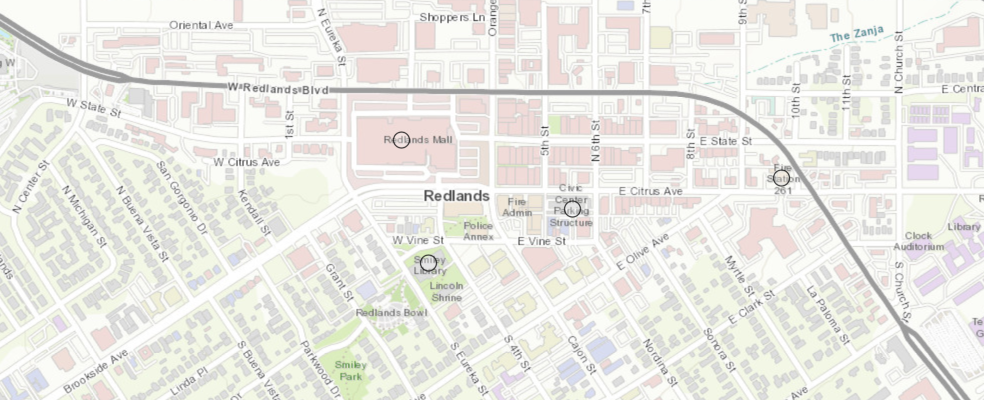

In [17]:
map1 = gis.map('Redlands, CA', 14)
map1

The corresponding addresses for the four clicked points shown above are listed here:
```
207 Redlands Mall, Redlands, California, 92373
125 W Vine St, Redlands, California, 92373
Redlands Fire Department Station 261
137 E Vine St, Redlands, California, 92373
```

In [16]:
def find_addr(m, g):
    try:
        geocoded = reverse_geocode(g)
        m.draw(g)
        print(geocoded['address']['Match_addr'])
    except:
        print("Couldn't match address. Try another place...")

map1.on_click(find_addr)

## Get result as intersection instead of address (`return_intersection` param)

 - `return_intersection` parameter
   - A Boolean which specifies whether the service should return the nearest street intersection or the nearest address to the input location. 
   - If True, then the closest intersection to the input location is returned; 
   - if False, then the closest address to the input location is returned. 
   - The default value is False.


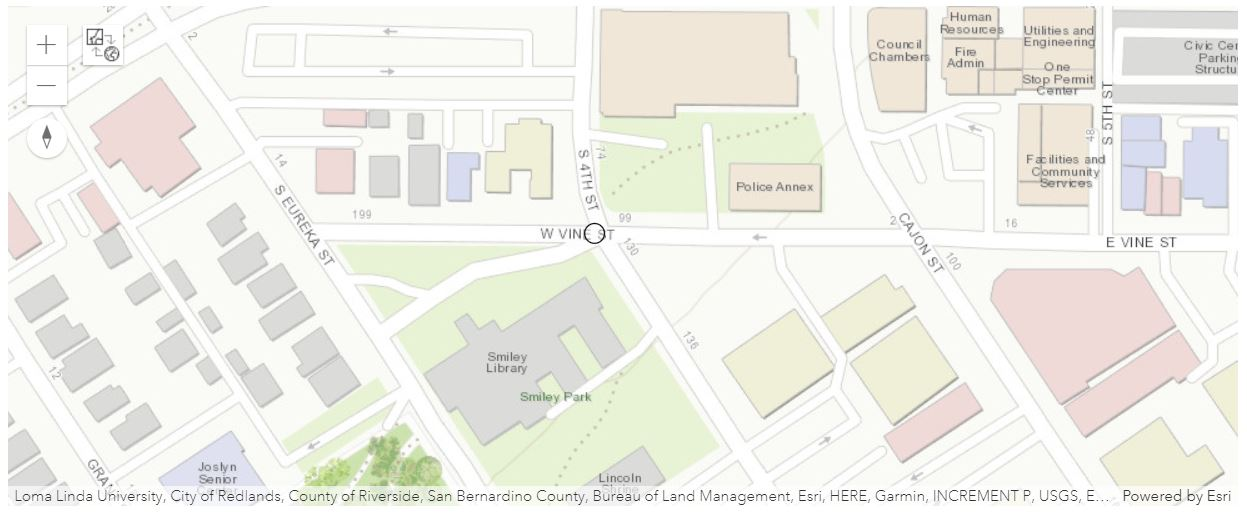

In [30]:
# Let's take a look at the intersection of W. Vine St & S 4th St in the city of Redlands, CA

In [25]:
from arcgis.geocoding import geocode
intersect_loc = geocode("S 4th St & W Vine, Redlands, CA")[0]['location']
print(intersect_loc)

{'x': -117.18361987601203, 'y': 34.0546600260095}


When `return_intersection` parameter is not specified, or set to False, then the closest address to the input location is returned. We can see from below that the returned address is a `StreetAddress` instead of intersection, and the matched addresses are of `Street number 130 to 134 on the S 4th St`.

In [26]:
reverse_geocode(intersect_loc)

{'address': {'Match_addr': '130-134 S 4th St, Redlands, California, 92373',
  'LongLabel': '130-134 S 4th St, Redlands, CA, 92373, USA',
  'ShortLabel': '130-134 S 4th St',
  'Addr_type': 'StreetAddress',
  'Type': '',
  'PlaceName': '',
  'AddNum': '130',
  'Address': '130 S 4th St',
  'Block': '',
  'Sector': '',
  'Neighborhood': 'South Redlands',
  'District': '',
  'City': 'Redlands',
  'MetroArea': 'Inland Empire',
  'Subregion': 'San Bernardino County',
  'Region': 'California',
  'Territory': '',
  'Postal': '92373',
  'PostalExt': '',
  'CountryCode': 'USA'},
 'location': {'x': -117.18367019351942,
  'y': 34.054620721017486,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}}

On the other hand, when set to `True`, then the closest intersection to the input location is returned that we can see from the `Match_addr` and `Addr_Type` output fields shown below:

In [27]:
reverse_geocode(intersect_loc,
                return_intersection = True)

{'address': {'Match_addr': 'S 4th St & W Vine St, Redlands, California, 92373',
  'LongLabel': 'S 4th St & W Vine St, Redlands, CA, 92373, USA',
  'ShortLabel': 'S 4th St & W Vine St',
  'Addr_type': 'StreetInt',
  'Type': '',
  'PlaceName': '',
  'AddNum': '',
  'Address': 'S 4th St & W Vine St',
  'Block': '',
  'Sector': '',
  'Neighborhood': 'South Redlands',
  'District': '',
  'City': 'Redlands',
  'MetroArea': 'Inland Empire',
  'Subregion': 'San Bernardino County',
  'Region': 'California',
  'Territory': '',
  'Postal': '92373',
  'PostalExt': '',
  'CountryCode': 'USA'},
 'location': {'x': -117.18361987601203,
  'y': 34.05466002600951,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}}

## Get results in desired SR

 - `out_sr` parameter

   - The spatial reference of the x/y coordinates returned by a geocode request. This is useful for applications using a map with a spatial reference different than that of the geocode service.
   - The spatial reference can be specified as either a `well-known ID (WKID)` or as `a JSON spatial reference object`. If `out_sr` is not specified, the spatial reference of the output locations is the same as that of the service. The World Geocoding Service spatial reference is `WGS84 (WKID = 4326)`.

Example (`102100` is the `WKID` for the Web Mercator projection):
```
out_sr=102100
```

The first example below shows two other versions of <a href="part5_reverse_geocode.ipynb#Example-4---location-input-as-Point-Geometry-object">Example 4</a>, when `our_sr` is specified different than WGS84:

In [31]:
reverse_geocode(location = {  'x': 103.87671885261159,
                              'y': 1.333058719212687,
                              'spatialReference': {'wkid': 4326, 'latestWkid': 4326}},
                out_sr = 3857)

{'address': {'Match_addr': 'Sennett Estate, 40 Lichi Avenue, 348814, Singapore',
  'LongLabel': 'Sennett Estate, 40 Lichi Avenue, 348814, Singapore, SGP',
  'ShortLabel': 'Sennett Estate, 40 Lichi Avenue',
  'Addr_type': 'PointAddress',
  'Type': '',
  'PlaceName': '',
  'AddNum': '40',
  'Address': 'Sennett Estate, 40 Lichi Avenue',
  'Block': '',
  'Sector': '',
  'Neighborhood': '',
  'District': '',
  'City': 'Singapore',
  'MetroArea': '',
  'Subregion': '',
  'Region': 'Singapore',
  'Territory': '',
  'Postal': '348814',
  'PostalExt': '',
  'CountryCode': 'SGP'},
 'location': {'x': 11563503.447948763,
  'y': 148408.80784300127,
  'spatialReference': {'wkid': 102100, 'latestWkid': 3857}}}

In [33]:
reverse_geocode(location = {  'x': 103.87671885261159,
                              'y': 1.333058719212687,
                              'spatialReference': {'wkid': 4326, 'latestWkid': 4326}},
                out_sr = {'wkid': 4326, 'latestWkid': 102100})

{'address': {'Match_addr': 'Sennett Estate, 40 Lichi Avenue, 348814, Singapore',
  'LongLabel': 'Sennett Estate, 40 Lichi Avenue, 348814, Singapore, SGP',
  'ShortLabel': 'Sennett Estate, 40 Lichi Avenue',
  'Addr_type': 'PointAddress',
  'Type': '',
  'PlaceName': '',
  'AddNum': '40',
  'Address': 'Sennett Estate, 40 Lichi Avenue',
  'Block': '',
  'Sector': '',
  'Neighborhood': '',
  'District': '',
  'City': 'Singapore',
  'MetroArea': '',
  'Subregion': '',
  'Region': 'Singapore',
  'Territory': '',
  'Postal': '348814',
  'PostalExt': '',
  'CountryCode': 'SGP'},
 'location': {'x': 11563503.447948763,
  'y': 148408.80784300127,
  'spatialReference': {'wkid': 102100, 'latestWkid': 3857}}}

## Get results in desired language (`lang_code` param)

 - `lang_code` parameter
   - Sets the language in which reverse-geocoded addresses are returned. Addresses in many countries are available in more than one language; in these cases the `lang_code` parameter can be used to specify which language should be used for addresses returned by the `reverse_geocode()` method. This is useful for ensuring that addresses are returned in the expected language by reverse geocoding functionality in an application. For example, a web application could be designed to get the browser language and then pass it as the `lang_code` parameter value in a `reverse_geocode` request.
   - See the <a href="https://developers.arcgis.com/rest/geocode/api-reference/geocode-coverage.htm#GUID-D61FB53E-32DF-4E0E-A1CC-473BA38A23C0">table</a> of supported countries for valid language code values in each country. 
   
Now let's look at an example of `reverse_geocode()` using `land_code` parameter being applied to the starting point of `Great Wall` at China, and the `Taj Marble` in India:

In [44]:
# returning Simplified Chinese
reverse_geocode(location = {'x': 119.79533000000004, 'y': 39.96675000000005}, 
                lang_code = "ZH")

{'address': {'Match_addr': '河北省秦皇岛市山海关区',
  'LongLabel': '河北省秦皇岛市山海关区',
  'ShortLabel': '河北省秦皇岛市山海关区',
  'CountryCode': 'CHN',
  'City': '秦皇岛市',
  'Neighborhood': '山海关区',
  'Region': '河北省',
  'Address': '河北省秦皇岛市山海关区',
  'Addr_type': 'Locality',
  'Type': '',
  'PlaceName': '',
  'AddNum': '',
  'Block': '',
  'Sector': '',
  'District': '',
  'MetroArea': '',
  'Subregion': '',
  'Territory': '',
  'Postal': '',
  'PostalExt': ''},
 'location': {'x': 119.744545,
  'y': 40.018464,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}}

In [46]:
# returns in Hindi
reverse_geocode({'x': 74.81476000000004, 'y': 34.02453000000003},
                lang_code="HIN")

{'address': {'Match_addr': 'एनएच-1ए, नातिपुरा, श्रीनगर, जम्मू और कश्मीर, 190015',
  'LongLabel': 'एनएच-1ए, नातिपुरा, श्रीनगर, जम्मू और कश्मीर, 190015, IND',
  'ShortLabel': 'एनएच-1ए',
  'Addr_type': 'StreetName',
  'Type': '',
  'PlaceName': '',
  'AddNum': '',
  'Address': 'एनएच-1ए',
  'Block': '',
  'Sector': '',
  'Neighborhood': '',
  'District': 'नातिपुरा',
  'City': 'श्रीनगर',
  'MetroArea': '',
  'Subregion': 'श्रीनगर',
  'Region': 'जम्मू और कश्मीर',
  'Territory': '',
  'Postal': '190015',
  'PostalExt': '',
  'CountryCode': 'IND'},
 'location': {'x': 74.81476450480069,
  'y': 34.024511515995734,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}}

## Customize the address type of searches (`feature_types` param)

`feature_types` parameter:
 - Limits the possible match types performed by the `reverse_geocode` method. 
 - If a single value is included, the search tolerance for the input feature type is `500` meters. 
 - If multiple values (separated by a comma, with no spaces) are included, the default search distances specified in the feature type <a href="https://developers.arcgis.com/rest/geocode/api-reference/geocoding-reverse-geocode.htm#GUID-FC97069F-310B-44A8-9DD1-8EC188170831">hierarchy table</a> are applied.
 - The list below includes the valid values for the `feature_types` parameter:
   - <b>StreetInt, DistanceMarker, StreetAddress, StreetName, POI, PointAddress, Postal, and Locality</b>
   
Let's see an example of reverse geocoding for `the Chicago Bean` (at `{'x': -87.62330658179597, 'y': 41.88270312963476}`) and how changing the `feature_types` from `POI` to `StreetAddress` or other types in getting navigable address for `GPS` will be different. Note that there will be different output of the X,Y coords in the returned dict):


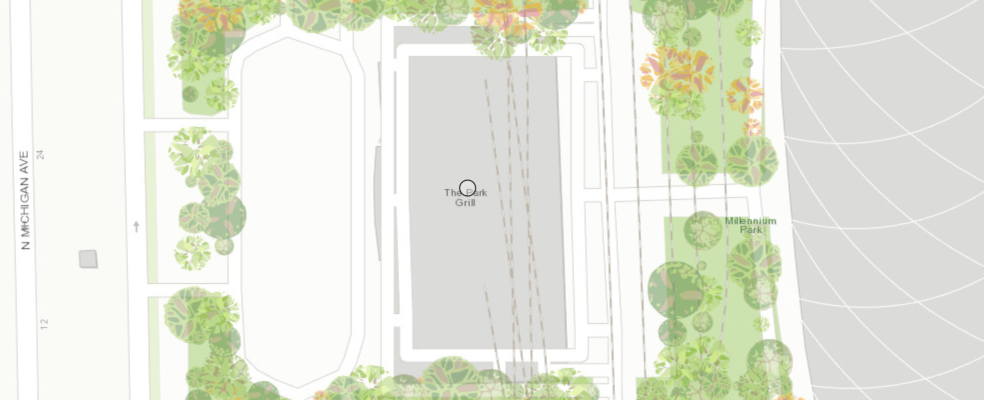

In [62]:
map3 = gis.map("The Bean, Chicago")
map3

In [61]:
map3.draw({'x': -87.62330658179597, 'y': 41.88270312963476})

In [59]:
# without specifying the `feature_types`
reverse_geocode({'x': -87.62330658179597, 'y': 41.88270312963476})

{'address': {'Match_addr': 'The Bean',
  'LongLabel': 'The Bean, Chicago, IL, 60603, USA',
  'ShortLabel': 'The Bean',
  'Addr_type': 'POI',
  'Type': 'Tourist Attraction',
  'PlaceName': 'The Bean',
  'AddNum': '',
  'Address': '',
  'Block': '',
  'Sector': '',
  'Neighborhood': 'Loop',
  'District': '',
  'City': 'Chicago',
  'MetroArea': 'Chicagoland',
  'Subregion': 'Cook County',
  'Region': 'Illinois',
  'Territory': '',
  'Postal': '60603',
  'PostalExt': '',
  'CountryCode': 'USA'},
 'location': {'x': -87.62351654847046,
  'y': 41.88258318460035,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}}

In [63]:
# search tolerance = 25 meters
reverse_geocode({'x': -87.62330658179597, 'y': 41.88270312963476},
                feature_types = "POI")

{'address': {'Match_addr': 'The Bean',
  'LongLabel': 'The Bean, Chicago, IL, 60603, USA',
  'ShortLabel': 'The Bean',
  'Addr_type': 'POI',
  'Type': 'Tourist Attraction',
  'PlaceName': 'The Bean',
  'AddNum': '',
  'Address': '',
  'Block': '',
  'Sector': '',
  'Neighborhood': 'Loop',
  'District': '',
  'City': 'Chicago',
  'MetroArea': 'Chicagoland',
  'Subregion': 'Cook County',
  'Region': 'Illinois',
  'Territory': '',
  'Postal': '60603',
  'PostalExt': '',
  'CountryCode': 'USA'},
 'location': {'x': -87.62351654847046,
  'y': 41.88258318460035,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}}

In [68]:
# search_tolerance = 10 meters
reverse_geocode({'x': -87.62330658179597, 'y': 41.88270312963476},
                feature_types = "StreetInt")

{'address': {'Match_addr': 'N Michigan Ave & E Washington St, Chicago, Illinois, 60602',
  'LongLabel': 'N Michigan Ave & E Washington St, Chicago, IL, 60602, USA',
  'ShortLabel': 'N Michigan Ave & E Washington St',
  'Addr_type': 'StreetInt',
  'Type': '',
  'PlaceName': '',
  'AddNum': '',
  'Address': 'N Michigan Ave & E Washington St',
  'Block': '',
  'Sector': '',
  'Neighborhood': 'Loop',
  'District': '',
  'City': 'Chicago',
  'MetroArea': 'Chicagoland',
  'Subregion': 'Cook County',
  'Region': 'Illinois',
  'Territory': '',
  'Postal': '60602',
  'PostalExt': '',
  'CountryCode': 'USA'},
 'location': {'x': -87.62420993653322,
  'y': 41.883260026519764,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}}

In [66]:
# search_tolerance = 50 meters
reverse_geocode({'x': -87.62330658179597, 'y': 41.88270312963476},
                feature_types = "PointAddress")

{'address': {'Match_addr': '11 N Michigan Ave, Chicago, Illinois, 60602',
  'LongLabel': '11 N Michigan Ave, Chicago, IL, 60602, USA',
  'ShortLabel': '11 N Michigan Ave',
  'Addr_type': 'PointAddress',
  'Type': '',
  'PlaceName': '',
  'AddNum': '11',
  'Address': '11 N Michigan Ave',
  'Block': '',
  'Sector': '',
  'Neighborhood': '',
  'District': '',
  'City': 'Chicago',
  'MetroArea': '',
  'Subregion': 'Cook County',
  'Region': 'Illinois',
  'Territory': '',
  'Postal': '60602',
  'PostalExt': '4812',
  'CountryCode': 'USA'},
 'location': {'x': -87.62416702118875,
  'y': 41.882649614421034,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}}

In [69]:
# search_tolerance = 3 meters
reverse_geocode({'x': -87.62330658179597, 'y': 41.88270312963476},
                feature_types = "StreetAddress,DistanceMarker,StreetName")

{'address': {'Match_addr': '37-63 N Michigan Ave, Chicago, Illinois, 60602',
  'LongLabel': '37-63 N Michigan Ave, Chicago, IL, 60602, USA',
  'ShortLabel': '37-63 N Michigan Ave',
  'Addr_type': 'StreetAddress',
  'Type': '',
  'PlaceName': '',
  'AddNum': '51',
  'Address': '51 N Michigan Ave',
  'Block': '',
  'Sector': '',
  'Neighborhood': 'Loop',
  'District': '',
  'City': 'Chicago',
  'MetroArea': 'Chicagoland',
  'Subregion': 'Cook County',
  'Region': 'Illinois',
  'Territory': '',
  'Postal': '60602',
  'PostalExt': '',
  'CountryCode': 'USA'},
 'location': {'x': -87.62411833661915,
  'y': 41.88267859348437,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}}

In [70]:
# search_tolerance = within boundaries
# If the input location intersects multiple boundaries, the feature with the smallest area is returned.
reverse_geocode({'x': -87.62330658179597, 'y': 41.88270312963476},
                feature_types = "Locality,Postal")

{'address': {'Match_addr': '60603, Chicago, Illinois',
  'LongLabel': '60603, Chicago, IL, USA',
  'ShortLabel': '60603',
  'Addr_type': 'Postal',
  'Type': '',
  'PlaceName': '60603',
  'AddNum': '',
  'Address': '',
  'Block': '',
  'Sector': '',
  'Neighborhood': '',
  'District': '',
  'City': 'Chicago',
  'MetroArea': '',
  'Subregion': 'Cook County',
  'Region': 'Illinois',
  'Territory': '',
  'Postal': '60603',
  'PostalExt': '',
  'CountryCode': 'USA'},
 'location': {'x': -87.62330658179597,
  'y': 41.88270312963476,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}}

## Limit searches by `distance` param
Here, note that default distance varies by feature_types and more can be learnt from here

`distance` parameter
 - The optional distance parameter allows you to specify a radial distance in meters to search for an address from the specified location. If no distance value is specified then the value is assumed to be 100 meters.

Example:
```
distance=50
```

In [128]:
# search_tolerance = 10 meters
reverse_geocode({'x': -87.62330985,'y':41.88270585},
                feature_types = "POI",
                distance=10)

{'address': {'Match_addr': 'The Bean',
  'LongLabel': 'The Bean, Chicago, IL, 60603, USA',
  'ShortLabel': 'The Bean',
  'Addr_type': 'POI',
  'Type': 'Tourist Attraction',
  'PlaceName': 'The Bean',
  'AddNum': '',
  'Address': '',
  'Block': '',
  'Sector': '',
  'Neighborhood': 'Loop',
  'District': '',
  'City': 'Chicago',
  'MetroArea': 'Chicagoland',
  'Subregion': 'Cook County',
  'Region': 'Illinois',
  'Territory': '',
  'Postal': '60603',
  'PostalExt': '',
  'CountryCode': 'USA'},
 'location': {'x': -87.62351981667449,
  'y': 41.88258590496559,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}}

In [135]:
# search_tolerance = 500 meters
reverse_geocode({'x': -87.62330995,'y':41.88270595},
                distance=500)

{'address': {'Match_addr': 'Park Cafe',
  'LongLabel': 'Park Cafe, 11 N Michigan Ave, Chicago, IL, 60602, USA',
  'ShortLabel': 'Park Cafe',
  'Addr_type': 'POI',
  'Type': 'Restaurant',
  'PlaceName': 'Park Cafe',
  'AddNum': '11',
  'Address': '11 N Michigan Ave',
  'Block': '',
  'Sector': '',
  'Neighborhood': '',
  'District': '',
  'City': 'Chicago',
  'MetroArea': '',
  'Subregion': 'Cook County',
  'Region': 'Illinois',
  'Territory': '',
  'Postal': '60602',
  'PostalExt': '',
  'CountryCode': 'USA'},
 'location': {'x': -87.62330499999996,
  'y': 41.88267500000006,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}}

## Conclusions

In this Part 5 of the Series, we have explored how to perform `reverse_geocode()` with different input (e.g. JSON, `List` object, or Point `Geometry` object), and/or using optional parameters to limit the search results which include `lang_code`, `distance`, `feature_types` etc. In the next notebook, let's discuss how to work with customized `geocoder`.